In [1]:
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sys.path.append('/envs')
sys.path.append('/models')
import envs.viper as vpr
import models.models as models
import models.dqn as dqn

In [3]:
import importlib
importlib.reload(vpr); importlib.reload(models); importlib.reload(dqn)

<module 'models.dqn' from 'h:\\Coding Projects\\Python Projects\\Deep-XIV-Rotation\\models\\dqn.py'>

In [4]:
torch.cuda.empty_cache()

In [5]:
viper_env = vpr.Viper(_sks = 798)

b123


In [6]:
agent = dqn.DQN(viper_env, _max_history=8192)

Created model dense_v1 with 15 features and 9 actions.
Model loaded onto cuda:0.
Layer (type:depth-idx)                   Output Shape              Param #
DenseNetV3                               [196, 9]                  --
├─Sequential: 1-1                        [196, 9]                  --
│    └─Linear: 2-1                       [196, 4096]               65,536
│    └─SELU: 2-2                         [196, 4096]               --
│    └─Linear: 2-3                       [196, 4096]               16,781,312
│    └─Tanh: 2-4                         [196, 4096]               --
│    └─Linear: 2-5                       [196, 2048]               8,390,656
│    └─BatchNorm1d: 2-6                  [196, 2048]               4,096
│    └─ReLU: 2-7                         [196, 2048]               --
│    └─Dropout: 2-8                      [196, 2048]               --
│    └─Linear: 2-9                       [196, 1024]               2,098,176
│    └─ReLU: 2-10                        [196

In [7]:
action_sequence=[1, 3, 6, 8, 0, 2, 5, 0, 0]
agent.env.reset_env()
_sum = 0
for a in action_sequence:
    res = agent.env.step(a, True)
    _sum+=res[0]
    print(f'({res[0]:.2f}, {res[1]:.0f}, {res[2]:.2f})')
print(_sum)

Took action: 1-reaving_fangs @ 0.000
(0.43, 200, 200.04)
Took action: 3-swiftskins_sting @ 2.450
(0.61, 300, 312.52)
Took action: 6-hindsting_strike @ 4.900
(0.83, 400, 397.08)
Took action: 8-death_rattle @ 5.600
(0.61, 280, 282.24)
Took action: 0-steel_fangs @ 6.980
(0.64, 300, 303.78)
Took action: 2-hunters_sting @ 9.060
(0.62, 300, 292.71)
Took action: 5-flanksbane_fang @ 11.140
(1.18, 550, 550.46)
Took action: 0-steel_fangs @ 13.220
(0.44, 220, 222.87)
Took action: 0-steel_fangs @ 13.920
(-0.23, 0, 0.00)
5.126222222222222


In [8]:
agent.env.reset_env()

In [13]:
agent.train(gamma=0.80, num_epochs=350, session_limit=100)

Epoch 0 Loss: 4.44e-04 E_0: 0.22 E_1: 0.00 G: 0.80 Rewards: 5.5 Eval Rewards: 32.48, LR: 5.0e-05 SKS: 822
Epoch 1 Loss: 1.53e-04 E_0: 0.22 E_1: 0.00 G: 0.80 Rewards: 6.0 Eval Rewards: 32.43, LR: 5.0e-05 SKS: 420
Epoch 2 Loss: 1.13e-04 E_0: 0.22 E_1: 0.00 G: 0.80 Rewards: -0.8 Eval Rewards: -7.08, LR: 5.0e-05 SKS: 582
Epoch 3 Loss: 1.11e-04 E_0: 0.22 E_1: 0.00 G: 0.80 Rewards: 4.6 Eval Rewards: 32.47, LR: 5.0e-05 SKS: 768
Epoch 4 Loss: 1.06e-04 E_0: 0.21 E_1: 0.00 G: 0.80 Rewards: 4.1 Eval Rewards: 32.45, LR: 5.0e-05 SKS: 528
Epoch 5 Loss: 1.08e-04 E_0: 0.21 E_1: 0.00 G: 0.80 Rewards: 2.3 Eval Rewards: 32.48, LR: 5.0e-05 SKS: 822
Epoch 6 Loss: 1.05e-04 E_0: 0.21 E_1: 0.00 G: 0.80 Rewards: 1.6 Eval Rewards: 32.48, LR: 5.0e-05 SKS: 822
Epoch 7 Loss: 1.06e-04 E_0: 0.21 E_1: 0.00 G: 0.80 Rewards: 1.7 Eval Rewards: 32.48, LR: 5.0e-05 SKS: 822
Epoch 8 Loss: 1.05e-04 E_0: 0.21 E_1: 0.00 G: 0.80 Rewards: 2.9 Eval Rewards: 30.79, LR: 5.0e-05 SKS: 582
Epoch 9 Loss: 1.07e-04 E_0: 0.21 E_1: 0.00 G:

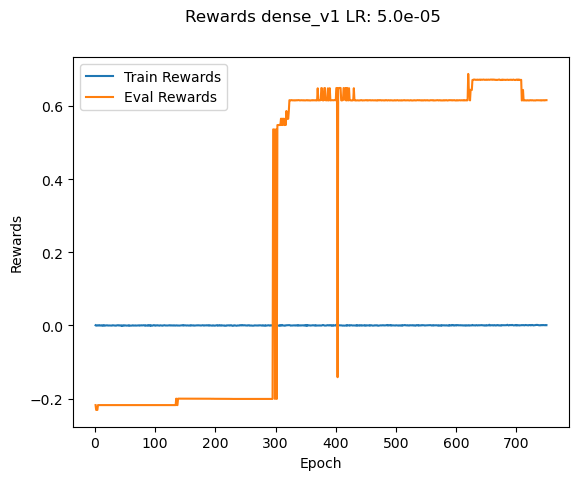

In [14]:
history_x = agent.training_history_x
history_y = agent.training_history_y
fig, ax = plt.subplots()
fig.suptitle(f'Rewards {agent.model_name} LR: {agent.lr:.1e}')
ax.plot(history_x, history_y)
ax.legend(['Train Rewards', 'Eval Rewards'])
ax.set_xlabel('Epoch')
ax.set_ylabel('Rewards')
plt.savefig('rewards_graph.png', bbox_inches='tight')
plt.show()

In [15]:
agent.load_checkpoint(f'./checkpoints/_{agent.model_name}_best.pth')

In [13]:
viper_env.compute_gcd(2.5, 798, 15)

2.08

In [16]:
# 2.12, 2.11, 2.10, 2.09, 2.08
#[420, 528, 582, 768, 822]
agent.test(num_steps=50, _sks=582)

tensor([ 2.4800, 10.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000])
Took action: 1-reaving_fangs @ 0.000
(0.43, 200, 205.54)
Took action: 2-hunters_sting @ 2.480
(0.61, 300, 301.82)
Took action: 4-flanksting_strike @ 4.960
(0.92, 440, 457.65)
Took action: 1-reaving_fangs @ 7.440
(0.43, 220, 219.11)
Took action: 3-swiftskins_sting @ 9.920
(0.68, 330, 329.67)
Took action: 6-hindsting_strike @ 12.400
(1.17, 550, 540.26)
Took action: 1-reaving_fangs @ 14.500
(0.44, 220, 230.33)
Took action: 3-swiftskins_sting @ 16.600
(0.69, 330, 320.05)
Took action: 6-hindsting_strike @ 18.700
(0.93, 440, 453.98)
Took action: 1-reaving_fangs @ 20.800
(0.44, 220, 212.24)
Took action: 3-swiftskins_sting @ 22.900
(0.69, 330, 320.02)
Took action: 6-hindsting_strike @ 25.000
(0.93, 440, 434.00)
Took action: 1-reaving_fangs @ 27.100
(0.44, 220, 222.78)
Took action: 3-swiftskins_sting @ 29.200
(0.69, 330, 343.66)
Took action: 6-h

34.3888888888889

In [15]:
pred = agent.predict(agent.env.state())
pred

tensor([[-0.0209,  0.0600, -0.0077,  0.0606,  0.0515,  0.0271,  0.0353,  0.0782,
         -0.0006]], device='cuda:0')

In [16]:
agent.env.reset_env()
pred = agent.predict(agent.env.state())
pred

tensor([[ 0.1179,  0.1261,  0.0107,  0.0510, -0.0158, -0.0016, -0.0866,  0.0297,
         -0.0682]], device='cuda:0')

In [17]:
agent.env.state()

tensor([ 2.5000, 10.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000])

terraform aws
kubernites
helm?
look into